<a href="https://colab.research.google.com/github/peterbmob/Labs/blob/main/EN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotta data för elementen i periodiska systemet

I den här boken använder vi oss av ett paket som here Mendeleev för att titta på trender hos elementen i periodiska systemet. Vi använder oss av python och paketen pandas och plotly för att phantera data och plotta den på ett effektivt sätt. 

In [1]:
#@title  installera mendeleev
%%capture
!pip install mendeleev[vis] 
!pip install --upgrade widget-periodictable

In [2]:
#@title  ladda moduler och skapa en dataframe med info om elektronnegativiteter
# i listan ovan hittar vi tre olika sätt att beskriva elektronegativiteten... låt oss samla in data i en dataframe
from mendeleev import element
from mendeleev.vis import create_vis_dataframe, periodic_table_plotly, heatmap

import pandas as pd
elements = create_vis_dataframe()

myowndb=pd.DataFrame({'Atomic Number':elements['atomic_number'],'Symbol':elements['symbol'],'Block':elements['block'],'EN$^{Pauling}$':elements['en_pauling'],'EN$^{Allen}$':elements['en_allen'],'EN$^{Ghosh}$':elements['en_ghosh'], 'EA':elements['electron_affinity']})
myowndb

,Atomic Number,Symbol,Block,EN$^{Pauling}$,EN$^{Allen}$,EN$^{Ghosh}$,EA
0,1,H,s,2.20,13.610,0.263800,0.754195
7,2,He,s,NaN,24.590,0.442712,-19.700000
14,3,Li,s,0.98,5.392,0.105093,0.618049
20,4,Be,s,1.57,9.323,0.144986,-2.400000
26,5,B,p,2.04,12.130,0.184886,0.279723
...,...,...,...,...,...,...,...
47,114,Fl,p,NaN,NaN,NaN,NaN
48,115,Mc,p,NaN,NaN,NaN,NaN
49,116,Lv,p,NaN,NaN,NaN,NaN
38,117,Ts,p,NaN,NaN,NaN,NaN


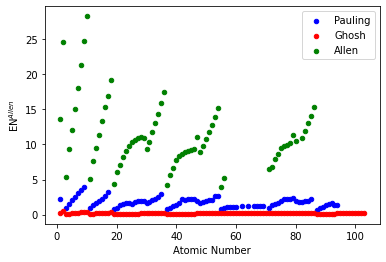

In [3]:
#@title  plotta elektronnegativitet mot atomnummer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = myowndb.plot.scatter(x='Atomic Number', y='EN$^{Pauling}$',label='Pauling', color='blue')
myowndb.plot.scatter(x='Atomic Number', y='EN$^{Ghosh}$',label='Ghosh', ax = ax, color='red')
myowndb.plot.scatter(x='Atomic Number', y='EN$^{Allen}$',label='Allen', ax= ax, color='green' )


Om vi vill plotta trender så måste vi samla alla data för de atomer vi är intresserade av i en matris. Detta kan göras mha pandas. Se nedan:

Mendeleevpaketet har också en funktion för att färglägga periodiska systemet, vilket ger os en bra överblick för att lära oss om trender i periodiska systemet. För att göra detta agör vi så här: 

In [4]:
#@title  ladda moduler
#peropdiska systemet färgat efter standard färger för atomer i jmol
from mendeleev.vis import periodic_table


In [5]:
#@title  plotta periodiska systemet färgat efter elektronnegativitet
periodic_table(attribute='en_pauling', colorby='attribute',
              title="Pauling's Electronegativity", cmap='jet')

In [7]:
#@title  ta fram egna "deskriptorer" för de olika elementen och färglägg periodiska systemet efter dem:

# plotta periodiska systemet färglagt efter egna deskriptorer, som efter skillnad i elektronegativetet map C 
from mendeleev.vis import create_vis_dataframe, periodic_table_plotly, heatmap
import numpy as np 
elements = create_vis_dataframe()
elements.loc[:, 'ENX-ENO'] =  np.abs(elements.loc[elements['symbol'] == 'O', 'en_pauling'].values - elements.loc[:, 'en_pauling'])

periodic_table_plotly(elements, attribute='ENX-ENO', colorby='attribute',
              cmap='jet', title='Pauling Electronegativity wrt. O')